In [36]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [37]:
train_input_path = "C:\\Users\\arunc\\Downloads\\employee_burnout_analysis-AI 2.xlsx"
test_input_path = "C:\\Users\\arunc\\Downloads\\employee_burnout_analysis-AI 2.xlsx"

In [38]:
train = pd.read_excel(train_input_path, index_col='Employee ID')
final_test = pd.read_excel(test_input_path, index_col='Employee ID')

In [39]:
train.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Employee ID,,,,,,,,
fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [40]:
print("\n",train['Gender'].value_counts())

print("\n",train['Company Type'].value_counts())

print("\n",train['WFH Setup Available'].value_counts())

print("\n",train['Designation'].value_counts().sort_index())

print("\n",train['Resource Allocation'].value_counts().sort_index())


 Gender
Female    11908
Male      10842
Name: count, dtype: int64

 Company Type
Service    14833
Product     7917
Name: count, dtype: int64

 WFH Setup Available
Yes    12290
No     10460
Name: count, dtype: int64

 Designation
0    1507
1    4881
2    7588
3    5985
4    2391
5     398
Name: count, dtype: int64

 Resource Allocation
1.0     1791
2.0     2075
3.0     3192
4.0     3893
5.0     3861
6.0     2943
7.0     1965
8.0     1044
9.0      446
10.0     159
Name: count, dtype: int64


In [41]:
train.dtypes

Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [42]:
train['Date of Joining'] = pd.to_datetime(train['Date of Joining'])
final_test['Date of Joining'] = pd.to_datetime(final_test['Date of Joining'])


gender = {'Female': 1,'Male': 0}
train['Gender'] = [gender[i] for i in train['Gender']]
final_test['Gender'] = [gender[i] for i in final_test['Gender']]


company_type = {'Service': 1,'Product': 0}
train['Company Type'] = [company_type[i] for i in train['Company Type']]
final_test['Company Type'] = [company_type[i] for i in final_test['Company Type']]


wfh_setup_avail = {'No': 0,'Yes': 1}
train['WFH Setup Available'] = [wfh_setup_avail[i] for i in train['WFH Setup Available']]
final_test['WFH Setup Available'] = [wfh_setup_avail[i] for i in final_test['WFH Setup Available']]


train['Designation'] = train['Designation'].astype('Int64')
final_test['Designation'] = final_test['Designation'].astype('Int64')

train['Resource Allocation'] = train['Resource Allocation'].astype('Int64')
final_test['Resource Allocation'] = final_test['Resource Allocation'].astype('Int64')

train.dtypes

Date of Joining         datetime64[ns]
Gender                           int64
Company Type                     int64
WFH Setup Available              int64
Designation                      Int64
Resource Allocation              Int64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [43]:
train.isnull().sum() 

Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [44]:
train = train.dropna()

In [45]:
train.isnull().sum() 

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [46]:
train[['Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']].corr()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.877893,0.691823,0.736412
Resource Allocation,0.877893,1.000000,0.799563,0.855005
Mental Fatigue Score,0.691823,0.799563,1.000000,0.944389
Burn Rate,0.736412,0.855005,0.944389,1.000000


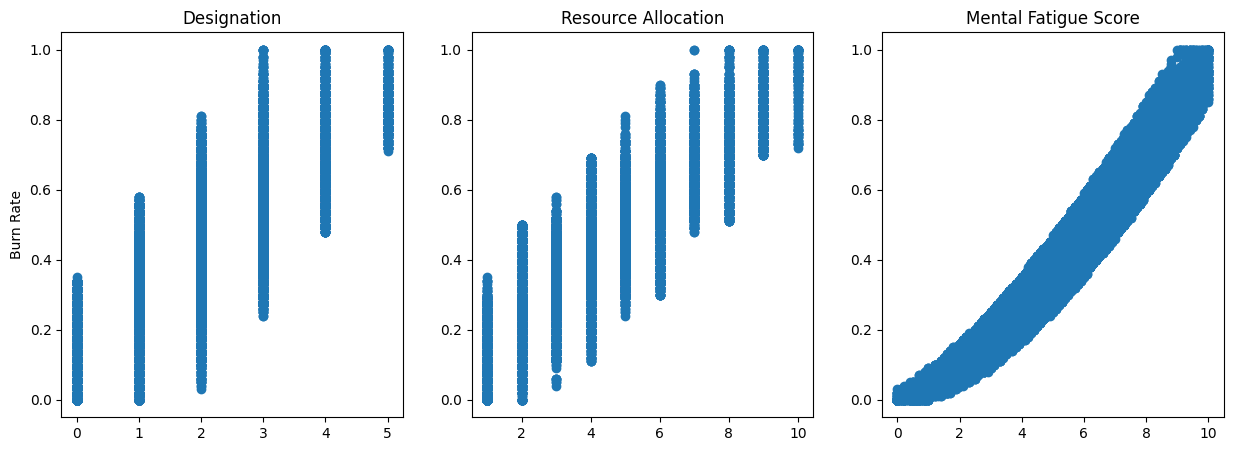

In [47]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(train['Designation'],train['Burn Rate'])
axs[0].set_title('Designation')
axs[0].set(ylabel='Burn Rate')
axs[1].scatter(train['Resource Allocation'],train['Burn Rate'])
axs[1].set_title('Resource Allocation')
axs[2].scatter(train['Mental Fatigue Score'],train['Burn Rate'])
axs[2].set_title('Mental Fatigue Score')
plt.show()

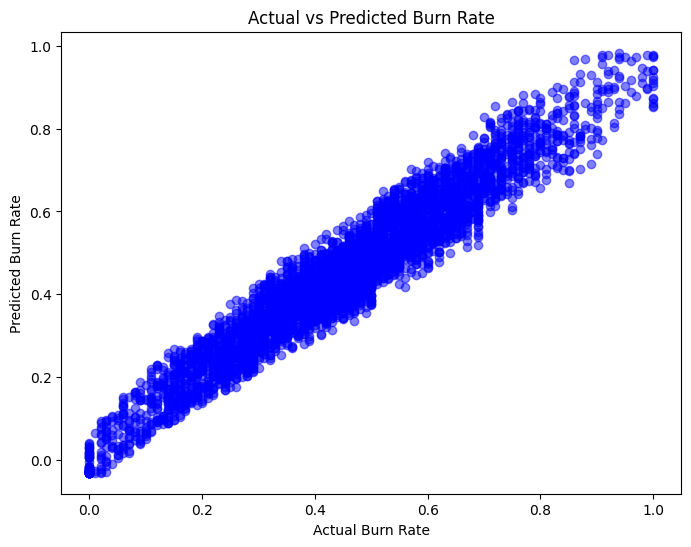

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict_lrm, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Burn Rate')
plt.xlabel('Actual Burn Rate')
plt.ylabel('Predicted Burn Rate')
plt.show()

C:\Users\arunc\AppData\Local\Temp\ipykernel_23848\2289429036.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features, y=coefficients, palette='viridis')


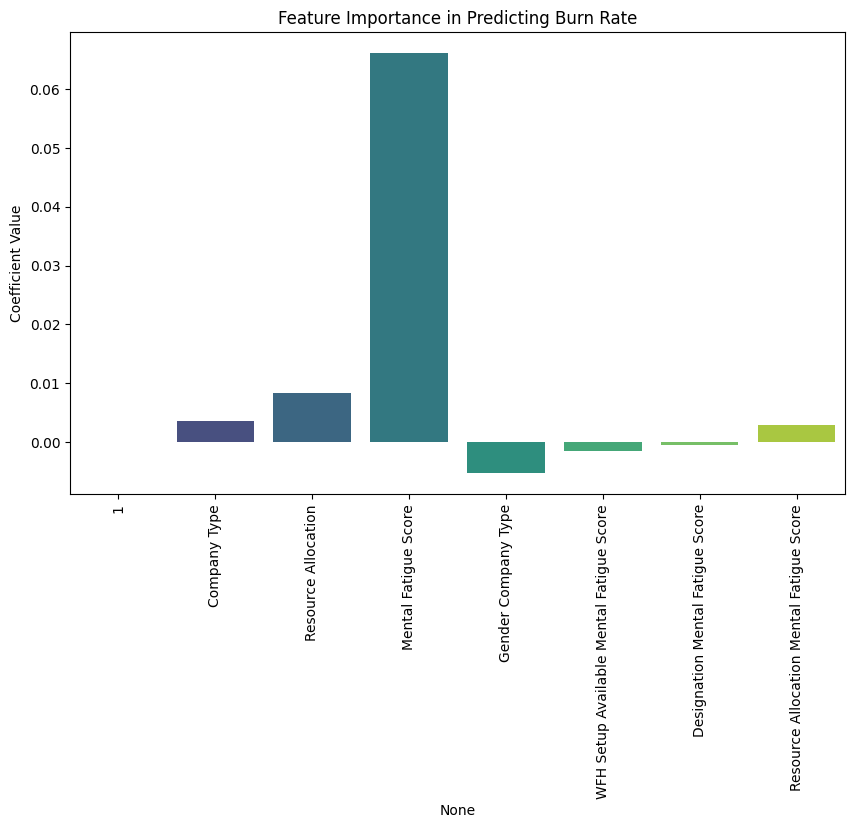

In [49]:
coefficients = lrm.coef_
features = X_train_lrm.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=coefficients, palette='viridis')
plt.title('Feature Importance in Predicting Burn Rate')
plt.xticks(rotation=90)
plt.ylabel('Coefficient Value')
plt.show()

In [50]:
train['Month of Joining'] = train['Date of Joining'].dt.month
final_test['Month of Joining'] = final_test['Date of Joining'].dt.month

train['Quarter of Joining'] = train['Date of Joining'].dt.quarter
final_test['Quarter of Joining'] = final_test['Date of Joining'].dt.quarter

from datetime import date, datetime

seasons = {'Summer':(datetime(2008,6,21), datetime(2008,9,22)),
           'Autumn':(datetime(2008,9,23), datetime(2008,12,20)),
           'Spring':(datetime(2008,3,21), datetime(2008,6,20))}

def get_season(row):
    date = row['Date of Joining']
    for season,(season_start, season_end) in seasons.items():
        if date>=season_start and date<= season_end:
            return season
    else:
        return 'Winter'
    
train['Season of Joining'] = train.apply(lambda row: get_season(row), axis=1)
final_test['Season of Joining'] = final_test.apply(lambda row: get_season(row), axis=1)

In [51]:
quater_dummies_train = pd.get_dummies(train['Quarter of Joining'], prefix='Quarter', drop_first=False)
season_dummies_train = pd.get_dummies(train['Season of Joining'], prefix='Season', drop_first=False)
designation_dummies_train = pd.get_dummies(train['Designation'], prefix='Designation', drop_first=False)

train = pd.concat([train, designation_dummies_train, quater_dummies_train, season_dummies_train], axis=1)

quater_dummies_final_test = pd.get_dummies(final_test['Quarter of Joining'], prefix='Quarter', drop_first=False)
season_dummies_final_test = pd.get_dummies(final_test['Season of Joining'], prefix='Season', drop_first=False)
designation_dummies_final_test = pd.get_dummies(final_test['Designation'], prefix='Designation', drop_first=False)

final_test = pd.concat([final_test, designation_dummies_final_test, quater_dummies_final_test, season_dummies_final_test], axis=1)

In [52]:
train.dtypes

Date of Joining         datetime64[ns]
Gender                           int64
Company Type                     int64
WFH Setup Available              int64
Designation                      Int64
Resource Allocation              Int64
Mental Fatigue Score           float64
Burn Rate                      float64
Month of Joining                 int32
Quarter of Joining               int32
Season of Joining               object
Designation_0                     bool
Designation_1                     bool
Designation_2                     bool
Designation_3                     bool
Designation_4                     bool
Designation_5                     bool
Quarter_1                         bool
Quarter_2                         bool
Quarter_3                         bool
Quarter_4                         bool
Season_Autumn                     bool
Season_Spring                     bool
Season_Summer                     bool
Season_Winter                     bool
dtype: object

In [53]:
X = train.drop(['Burn Rate','Date of Joining','Quarter of Joining','Season of Joining'], axis=1)
y = train['Burn Rate']

In [54]:
X.columns

Index(['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'Month of Joining',
       'Designation_0', 'Designation_1', 'Designation_2', 'Designation_3',
       'Designation_4', 'Designation_5', 'Quarter_1', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Season_Autumn', 'Season_Spring', 'Season_Summer',
       'Season_Winter'],
      dtype='object')

In [55]:
poly = PolynomialFeatures(interaction_only=True)
X_t = pd.DataFrame(poly.fit_transform(X[['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
                                         'Resource Allocation', 'Mental Fatigue Score', 'Month of Joining']]))

f_list = poly.get_feature_names_out(['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
                                     'Resource Allocation', 'Mental Fatigue Score', 'Month of Joining'])

X_t.columns = f_list
X_t.head()

,1,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Month of Joining,Gender Company Type,Gender WFH Setup Available,...,WFH Setup Available Designation,WFH Setup Available Resource Allocation,WFH Setup Available Mental Fatigue Score,WFH Setup Available Month of Joining,Designation Resource Allocation,Designation Mental Fatigue Score,Designation Month of Joining,Resource Allocation Mental Fatigue Score,Resource Allocation Month of Joining,Mental Fatigue Score Month of Joining
0,1.0,1.0,1.0,0.0,2.0,3.0,3.8,9.0,1.0,0.0,...,0.0,0.0,0.0,0.0,6.0,7.6,18.0,11.4,27.0,34.2
1,1.0,0.0,1.0,1.0,1.0,2.0,5.0,11.0,0.0,0.0,...,1.0,2.0,5.0,11.0,2.0,5.0,11.0,10.0,22.0,55.0
2,1.0,0.0,1.0,1.0,1.0,1.0,2.6,11.0,0.0,0.0,...,1.0,1.0,2.6,11.0,1.0,2.6,11.0,2.6,11.0,28.6
3,1.0,1.0,1.0,0.0,3.0,7.0,6.9,7.0,1.0,0.0,...,0.0,0.0,0.0,0.0,21.0,20.7,21.0,48.3,49.0,48.3
4,1.0,0.0,0.0,1.0,2.0,4.0,3.6,11.0,0.0,0.0,...,2.0,4.0,3.6,11.0,8.0,7.2,22.0,14.4,44.0,39.6


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.25, random_state=42)

features = ['1',
 'Company Type',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Gender Company Type',
 'WFH Setup Available Mental Fatigue Score',
 'Designation Mental Fatigue Score',
 'Resource Allocation Mental Fatigue Score'
               ]

X_train_lrm = X_train[features]
X_test_lrm = X_test[features]

lrm = linear_model.LinearRegression()
lrm.fit(X_train_lrm, y_train)

y_predict_lrm = lrm.predict(X_test_lrm)
print(y_predict_lrm)
print(y_predict_lrm.shape)

print('Coefficients:')
for item in zip(list(X_train_lrm.columns), lrm.coef_):
    print(item)

print('\nTrain R-squared: ', lrm.score(X_train_lrm, y_train))
print('Test R-squared: ', lrm.score(X_test_lrm, y_test))

[0.25507313 0.39052756 0.35031123 ... 0.50561215 0.40675933 0.54537366]
(4648,)
Coefficients:
('1', 0.0)
('Company Type', 0.0035436550633632783)
('Resource Allocation', 0.008384272303283934)
('Mental Fatigue Score', 0.06612902874945657)
('Gender Company Type', -0.00531140272796387)
('WFH Setup Available Mental Fatigue Score', -0.0015810880376155361)
('Designation Mental Fatigue Score', -0.000508877625757605)
('Resource Allocation Mental Fatigue Score', 0.002929328155445079)

Train R-squared:  0.9242642849762224
Test R-squared:  0.9245093953450513
